# Exploratory Data Analysis & Regression 

In [1]:
#WARNING: If you are on an older machince, do not just run all.
#One block loops through 40 regressions on ~600k data points. Make sure your system won't brick on that block.
#Most modern machines should be fine. We're not running svm or neural networks here.

#library/function file
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
cleanfiles=glob.glob('cleandata/cleandata*.csv') #use glob to make list of file names
cleandata=[]
for filename in cleanfiles:
    cleandata.append(pd.read_csv(filename))
print(cleandata[0].head())

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.005298      0.000010   21.36925   0.062593   0.091803  21.34495   
1     QSO  1.809911      0.001020   19.96998   0.016447   0.087534  19.80652   
2  GALAXY  0.165736      0.000045   18.48636   0.010928   0.091326  17.45197   
3  GALAXY  0.175763      0.000037   18.51347   0.010611   0.054182  17.39496   
4     QSO  2.837089      0.001295   21.86913   0.081375   0.074441  21.91569   

    red_err   red_ext  
0  0.083186  0.063509  
1  0.018459  0.060556  
2  0.007219  0.063179  
3  0.006816  0.037483  
4  0.140578  0.051498  


In [2]:
# double check data types
print(cleandata[-1].info())
print(cleandata[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 9 columns):
class           14218 non-null object
redshift        14218 non-null float64
redshift_err    14218 non-null float64
green_mag       14218 non-null float64
green_err       14218 non-null float64
green_ext       14218 non-null float64
red_mag         14218 non-null float64
red_err         14218 non-null float64
red_ext         14218 non-null float64
dtypes: float64(8), object(1)
memory usage: 999.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7137 entries, 0 to 7136
Data columns (total 9 columns):
class           7137 non-null object
redshift        7137 non-null float64
redshift_err    7137 non-null float64
green_mag       7137 non-null float64
green_err       7137 non-null float64
green_ext       7137 non-null float64
red_mag         7137 non-null float64
red_err         7137 non-null float64
red_ext         7137 non-null float64
dtypes: float64(8), object(1)
memory

In [3]:
#lets do some basic analysis on each sample size
print(cleandata[0].describe())
print(cleandata[6].describe())
print(cleandata[12].describe())
print(cleandata[35].describe())

          redshift  redshift_err    green_mag    green_err    green_ext  \
count  7137.000000   7137.000000  7137.000000  7137.000000  7137.000000   
mean      0.645305      0.005123    20.553864     0.093961     0.121257   
std       0.703874      0.445895     1.897691     0.138706     0.117639   
min      -0.000278     -4.000000    12.739920     0.001611     0.015372   
25%       0.186827      0.000033    18.882950     0.012407     0.060784   
50%       0.476386      0.000112    21.010080     0.048452     0.095220   
75%       0.638929      0.000198    22.003300     0.126598     0.151360   
max       6.824154     36.922280    27.120450     3.554536     6.019671   

           red_mag      red_err      red_ext  
count  7137.000000  7137.000000  7137.000000  
mean     19.405499     0.039123     0.083885  
std       1.678517     0.040639     0.081382  
min      11.757470     0.001502     0.010634  
25%      17.828820     0.009006     0.042050  
50%      19.913080     0.028571     0.0658

While there are large outliers for almost all of our data, due to the large sample size we chose, the standard deviation,mean, and median are all a good representation of the values we were trying to pull. 

In [4]:
#now we will start to seperate this data and form it into the variable we want
# for the first part lets split up quasars and galaxies first
i=0
qso=[0]*40
galaxy=[0]*40
header=['class','redshift','redshift_err','green_mag','green_err',
                  'green_ext','red_mag','red_err','red_ext']
while i < (len(cleandata) - 1):
    q=[]
    g=[]
    df=cleandata[i]
    for a in df.index:
        if df.loc[a,'class'] == "QSO":
            q.append(df.iloc[a,:])
        else:
            c=df.iloc[a,:]
            g.append(c.values)
    qso[i]=pd.DataFrame(q)
    galaxy[i]=pd.DataFrame(g)
    galaxy[i].columns=header
    galaxy[i]=galaxy[i].reset_index(drop=True)
    qso[i].columns=header
    qso[i]=qso[i].reset_index(drop=True)
    i+=1
    
print(galaxy[38].shape,qso[38].shape)

(17326, 9) (4020, 9)


In [5]:
print(galaxy[0].info(),galaxy[-1].info(),qso[0].info(),qso[-1].info())
#all data types were preserved so all is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 9 columns):
class           5732 non-null object
redshift        5732 non-null float64
redshift_err    5732 non-null float64
green_mag       5732 non-null float64
green_err       5732 non-null float64
green_ext       5732 non-null float64
red_mag         5732 non-null float64
red_err         5732 non-null float64
red_ext         5732 non-null float64
dtypes: float64(8), object(1)
memory usage: 403.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 9 columns):
class           17312 non-null object
redshift        17312 non-null float64
redshift_err    17312 non-null float64
green_mag       17312 non-null float64
green_err       17312 non-null float64
green_ext       17312 non-null float64
red_mag         17312 non-null float64
red_err         17312 non-null float64
red_ext         17312 non-null float64
dtypes: float64(8), object(1)
memory usag

In [6]:
#lets start with velocity and its associated errors and adding it to each respective data frame
c=299792.458 #kilometers/second
i=0
while i < (len(cleandata)- 1):
    vq=[]
    vg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['redshift']:
        vg.append(c*((((a+1)**2)-1)/(((a+1)**2)+1)))
    for n in dfq['redshift']:
        vq.append(c*((((n+1)**2)-1)/(((n+1)**2)+1))) 
    dfg['velocity']=vg
    dfq['velocity']=vq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

#now we have two lists of 40 data frames with the velocity added

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.005298      0.000010   21.36925   0.062593   0.091803  21.34495   
1  GALAXY  0.165736      0.000045   18.48636   0.010928   0.091326  17.45197   
2  GALAXY  0.175763      0.000037   18.51347   0.010611   0.054182  17.39496   
3  GALAXY  0.478360      0.000133   21.88871   0.112023   0.058774  20.10116   
4  GALAXY  0.134519      0.000031   18.19005   0.008442   0.041369  17.11940   

    red_err   red_ext       velocity  
0  0.083186  0.063509    1584.179274  
1  0.007219  0.063179   45616.859385  
2  0.006816  0.037483   48121.728823  
3  0.036888  0.040660  111572.103827  
4  0.005614  0.028619   37636.867442       class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.136515      0.000034   18.47898   0.009708   0.070519  17.43962   
1  GALAXY  0.153565      0.000033   18.57491   0.010969   0.171435  17.48785   
2  GALAXY  0.537122      0.000158   21.62044 

In [7]:
len(cleandata) - 1

40

In [8]:
#now we do this to create a Flux column, then use it to create the distance
Fsun=1361 #watts/meter^2
msun=-26.7
i=0
while i < (len(cleandata)- 1):
    fluxq=[]
    fluxg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['green_mag']:
        power = .4*(msun-a)
        scale = np.power(10., power)
        flux = (Fsun*scale)
        fluxnum = float(flux)
        fluxg.append(fluxnum)
    for n in dfq['green_mag']:
        power = .4*(msun-n)
        scale = np.power(10., power)
        flux = Fsun*scale
        fluxnum = float(flux)
        fluxq.append(fluxnum)
    
    dfg['Flux']=fluxg
    dfq['Flux']=fluxq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

/Users/nicholaskeefer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
/Users/nicholaskeefer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power


    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.005298      0.000010   21.36925   0.062593   0.091803  21.34495   
1  GALAXY  0.165736      0.000045   18.48636   0.010928   0.091326  17.45197   
2  GALAXY  0.175763      0.000037   18.51347   0.010611   0.054182  17.39496   
3  GALAXY  0.478360      0.000133   21.88871   0.112023   0.058774  20.10116   
4  GALAXY  0.134519      0.000031   18.19005   0.008442   0.041369  17.11940   

    red_err   red_ext       velocity          Flux  
0  0.083186  0.063509    1584.179274  8.056717e-17  
1  0.007219  0.063179   45616.859385  1.146342e-15  
2  0.006816  0.037483   48121.728823  1.118073e-15  
3  0.036888  0.040660  111572.103827  4.993144e-17  
4  0.005614  0.028619   37636.867442  1.506046e-15       class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.136515      0.000034   18.47898   0.009708   0.070519  17.43962   
1  GALAXY  0.153565      0.000033   18.57

In [9]:
#now finding distance 
Lqso=(10**38) #watts
Lgal=5*(10**30) #watts
mpc=3.068*(10**22)#converting meters to megaparsecs
i=0
while i < (len(cleandata)- 1):
    dq=[]
    dg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['Flux']:
        distance = ((Lgal/(4*np.pi*a))**(.5))/mpc
        dg.append(distance)
    for n in dfq['Flux']:
        distance2 = ((Lqso/(4*np.pi*n))**(.5))/mpc
        dq.append(distance2)
    
    dfg['distance']=dg
    dfq['distance']=dq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[1].head(),qso[1].head())

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.069436      0.000007   18.47655   0.010358   0.377898  17.60142   
1  GALAXY  0.120838      0.000013   17.84440   0.006528   0.069690  17.16591   
2  GALAXY  0.630355      0.000135   21.26520   0.087174   0.147008  20.56698   
3  GALAXY  0.737551      0.000242   20.05801   0.103710   0.277542  18.80948   
4  GALAXY  0.157568      0.000026   17.74920   0.008141   0.205962  16.51185   

    red_err   red_ext       velocity          Flux  distance  
0  0.007676  0.261428   20095.174398  1.156746e-15  0.604513  
1  0.005322  0.048211   34051.807014  2.070609e-15  0.451831  
2  0.070598  0.101699  135884.505667  8.867029e-17  2.183412  
3  0.053667  0.192002  150607.930017  2.695592e-16  1.252269  
4  0.004802  0.142484   43555.584828  2.260363e-15  0.432450     class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0   QSO  2.402313      0.000381   20.62419   0.023870   0.07706

In [10]:
import seaborn as sns
sns.set_context('poster')

# Redshift Velocity vs. Distance (Hubble's Law)

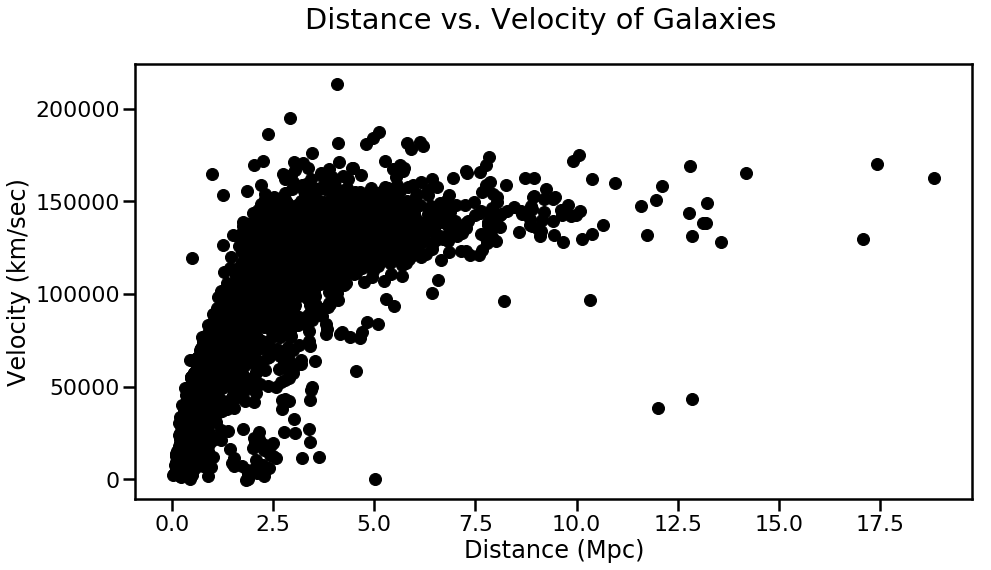

In [11]:
#Scatter of just galaxies from the first dataset

fig = plt.figure(figsize=(15, 8))
plt.plot(galaxy[0]["distance"], galaxy[0]["velocity"], "ko")
fig.suptitle('Distance vs. Velocity of Galaxies')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/sec)')

#Velocity in Kilometers/sec and Distance in MegaParsecs
fig.savefig('DistVeloGalaxy.jpg')

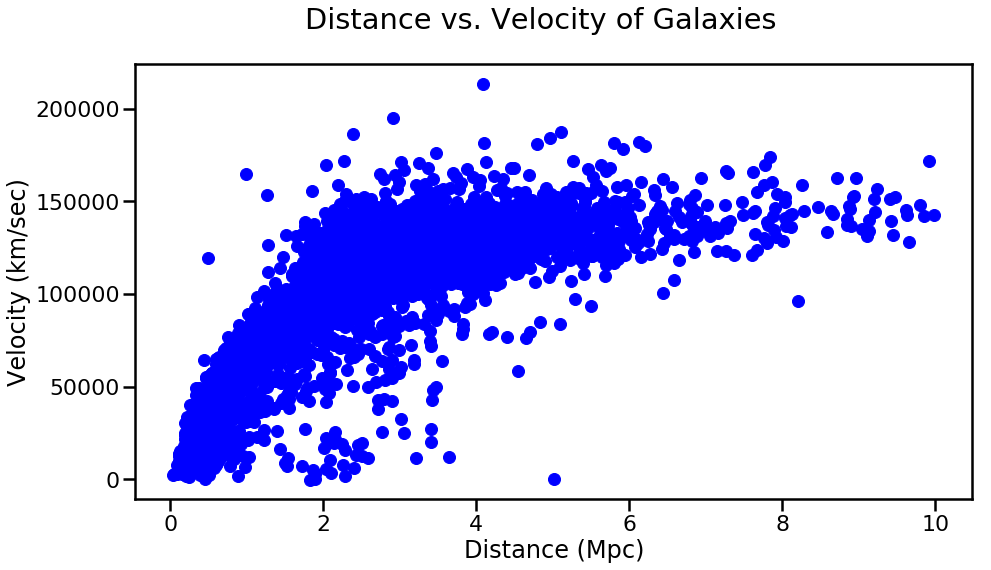

In [12]:
#Plotting with x-axis limit set to 10 Megaparsecs
galaxy_outlierkiller = galaxy[0][galaxy[0]["distance"]<10]
#Scatter of just galaxies from the first dataset
fig = plt.figure(figsize=(15, 8))
plt.plot(galaxy_outlierkiller["distance"], galaxy_outlierkiller["velocity"], "bo")
fig.suptitle('Distance vs. Velocity of Galaxies')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/sec)')

fig.savefig('DistVeloGalaxy2.jpg')

In [13]:
#It seems that the farther away an object is, the faster it is moving. Good sign. 
#However, it seems the relationship in our data isn't linear. 
#Velocity appears to be related to distance in a logarithmic fashion, or perhaps to the square root of distance.
model2 = sm.ols(formula = "galaxy_outlierkiller['velocity'] ~ galaxy_outlierkiller['distance']", data=galaxy_outlierkiller).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     galaxy_outlierkiller['velocity']   R-squared:                       0.703
Model:                                          OLS   Adj. R-squared:                  0.703
Method:                               Least Squares   F-statistic:                 1.350e+04
Date:                              Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                                      18:10:21   Log-Likelihood:                -65687.
No. Observations:                              5707   AIC:                         1.314e+05
Df Residuals:                                  5705   BIC:                         1.314e+05
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.547e+04    530.339     66.879      0.000    3.44e+04    3.65e+04
galaxy_outlierkiller['distance']  2.211e+04    190.335    116.171      0.000    2.17e+04    2.25e+04
==============================================================================
Omnibus:                      447.328   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              988.997
Skew:                          -0.501   Prob(JB):                    1.75e-215
Kurtosis:                       4.777   Cond. No.                         5.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Velocity (km/sec)')

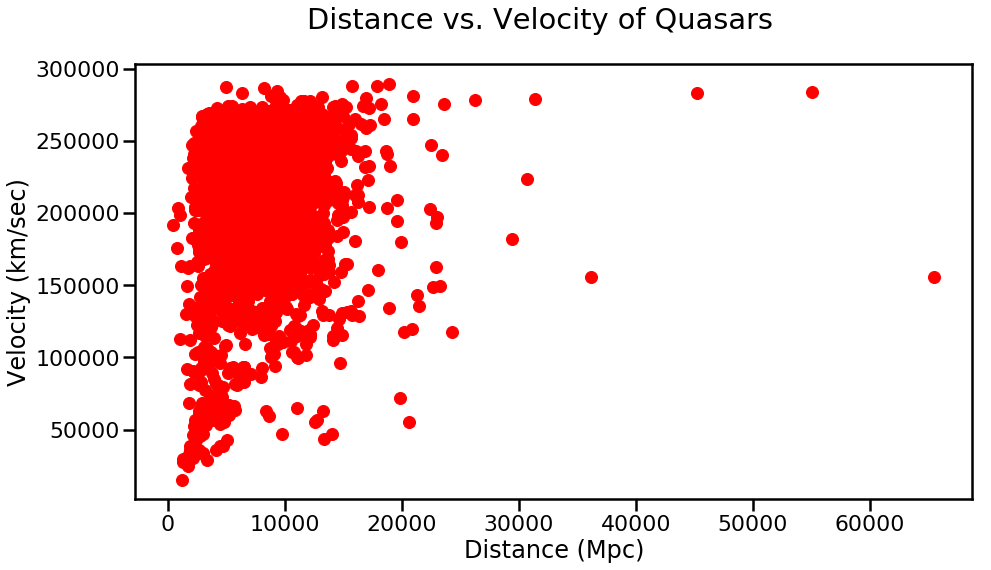

In [14]:
#Scatter of just quasars from the first dataset. Notice how values "fan out," 
#and that there are tons of crazy values out from the largest bunch of the crowd.
fig = plt.figure(figsize=(15, 8))
plt.plot(qso[11]["distance"], qso[11]["velocity"], "ro")
fig.suptitle('Distance vs. Velocity of Quasars')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/sec)')

In [15]:
#killing some outliers
for i in range(len(galaxy)):
    galaxy[i] = galaxy[i][galaxy[i]["distance"]<10]


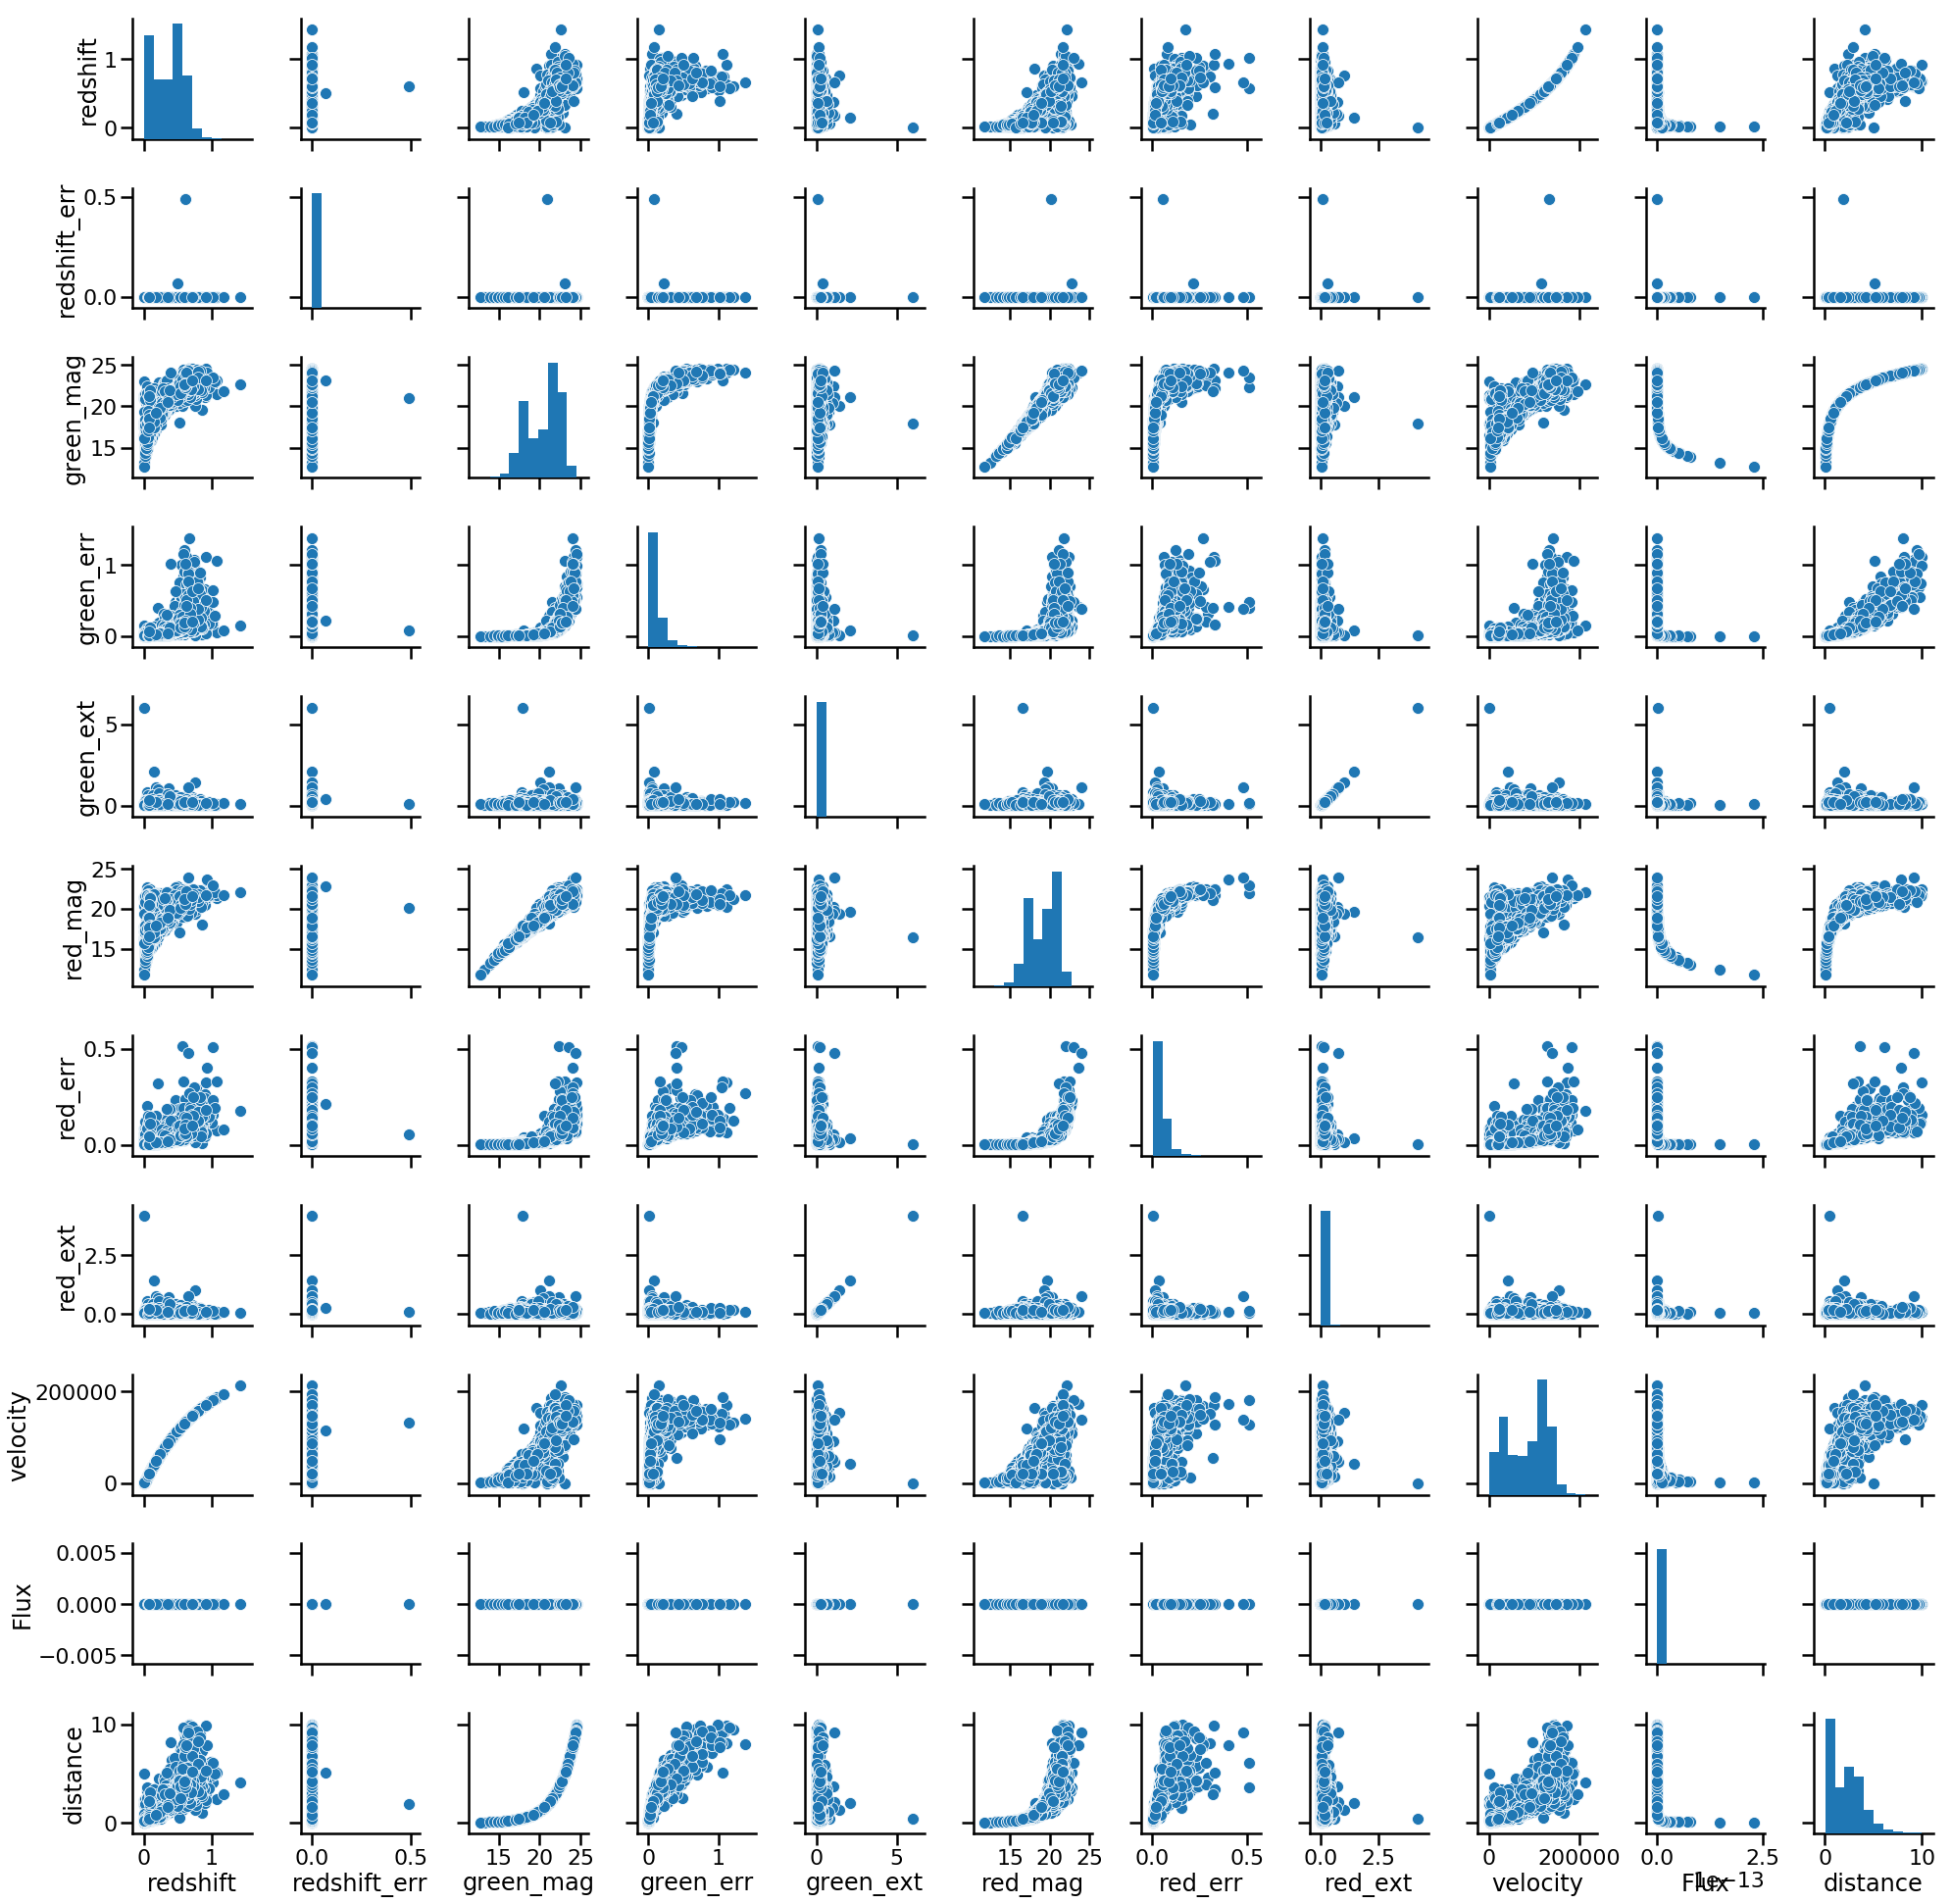

In [31]:
#Let's take a more in-depth look. 
#Results described in the "Exploratory Data Analysis" section of ReadMe

sns_plot = sns.pairplot(galaxy[0])
sns_plot.savefig('SnsPairPlot.png')


In [17]:
#We looked at ALL of these, but here is one example.
model3 = sm.ols(formula = "galaxy[19]['velocity'] ~ galaxy[19]['distance']", data=galaxy[19]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     galaxy[19]['velocity']   R-squared:                       0.709
Model:                                OLS   Adj. R-squared:                  0.709
Method:                     Least Squares   F-statistic:                 2.793e+04
Date:                    Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                            18:10:46   Log-Likelihood:            -1.3220e+05
No. Observations:                   11487   AIC:                         2.644e+05
Df Residuals:                       11485   BIC:                         2.644e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.414e+04    369.508     92.384      0.000    3.34e+04    3.49e+04
galaxy[19]['distance']  2.267e+04    135.660    167.108      0.000    2.24e+04    2.29e+04
==============================================================================
Omnibus:                     1233.050   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4512.203
Skew:                          -0.511   Prob(JB):                         0.00
Kurtosis:                       5.895   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Putting quasars and galaxies back together.
finaldata = []

for i in range(len(qso)):
    frames = [qso[i], galaxy[i]]
    whole_data = pd.concat(frames)
    finaldata.append(whole_data)

In [19]:
#Getting a flawed picture of the data just to see what we're dealing with. Nothing is weighted appropriately.

Galaxy_R_Squared = []
QSO_R_Squared = []
Total_R_Squared = []
i = 0
j = 0
k = 0
while (i < len(galaxy)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<10]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared.append(model4.rsquared)
        i += 1
    except:
        break
    
while (j < len(qso)):
    try:
        v = qso[j]['velocity']
        d = qso[j]['distance']
        data = qso[j]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        QSO_R_Squared.append(model5.rsquared)
        j += 1
    except:
        break
        
while (k < len(finaldata)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared.append(model5.rsquared)
        k += 1
    except:
        break
    
print("Galaxies R Squared: ",np.mean(Galaxy_R_Squared))
print("Variance: ",np.var(Galaxy_R_Squared))
print("Quasars R Squared: ",np.mean(QSO_R_Squared))
print("Variance: ",np.var(QSO_R_Squared))
print("Together R Squared: ",np.mean(Total_R_Squared))
print("Variance: ",np.var(Total_R_Squared))

Galaxies R Squared:  0.7108152805728694
Variance:  3.25608487843173e-05
Quasars R Squared:  0.041066633764203574
Variance:  9.465070025120687e-05
Together R Squared:  0.4636206661868648
Variance:  0.00027242580833278815


In [20]:
#It seems like galaxies perform decently well, with an average R Squared value of .552 across all of the sets of data.
#Quasars seem horrible. Typical R Squared value of .087. Again, this is probably due to our luminosity assumptions.
#Let's see how the larger sets perform compared to the smaller ones.

Galaxy_R_Squared7k = []
QSO_R_Squared7k = []
Total_R_Squared7k = []
Galaxy_R_Squared14k = []
QSO_R_Squared14k = []
Total_R_Squared14k = []
Galaxy_R_Squared21k = []
QSO_R_Squared21k = []
Total_R_Squared21k = []
Galaxy_R_Squared28k = []
QSO_R_Squared28k = []
Total_R_Squared28k = []
i = 0
j = 0
k = 0

while (i < 5):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared14k.append(model4.rsquared)
    i += 1
        
while ((i > 4) and (i < 10)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared21k.append(model4.rsquared)
    i += 1
        
while ((i > 9) and (i < 15)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared28k.append(model4.rsquared)
    i += 1

while ((i > 14) and (i < 20)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared7k.append(model4.rsquared)
        i += 1
    except:
        break

In [21]:
#Quasars

while (j < 5):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared14k.append(model4.rsquared)
    j += 1

while ((j > 4) and (j < 10)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared21k.append(model4.rsquared)
    j += 1

while ((j > 9) and (j < 15)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared28k.append(model4.rsquared)
    j += 1
        
while ((j > 14) and (j < 20)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared7k.append(model4.rsquared)
    j += 1

In [22]:
#Together

while (k < 5):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared14k.append(model4.rsquared)
    k += 1

while ((k > 4) and (k < 10)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared21k.append(model4.rsquared)
    k += 1
  
while ((k > 9) and (k < 15)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared28k.append(model4.rsquared)
    k += 1
        
while ((k > 14) and (k < 20)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared7k.append(model4.rsquared)
        k += 1
    except:
        break

In [23]:
print("7k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared7k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared7k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared7k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared7k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared7k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared7k),"\n")
print("14k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared14k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared14k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared14k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared14k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared14k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared14k),"\n")
print("21k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared21k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared21k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared21k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared21k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared21k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared21k),"\n")
print("28k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared28k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared28k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared28k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared28k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared28k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared28k))

7k:
Mean Total R Squared: 0.4560693049045013
Variance between Total R Squared values: 0.0001478347167088463
Mean Galaxy R Squared: 0.7093779920924324
Variance between Galaxy R Squared values: 2.9707905164288512e-05
Mean Quasar R Squared: 0.0338381049644171
Variance between Quasar R Squared values: 0.00010141164091296365 

14k:
Mean Total R Squared: 0.458106236619986
Variance between Total R Squared values: 0.0008293736261166572
Mean Galaxy R Squared: 0.7093864779288745
Variance between Galaxy R Squared values: 4.433094058791629e-05
Mean Quasar R Squared: 0.04266934017561528
Variance between Quasar R Squared values: 5.928709013355203e-05 

21k:
Mean Total R Squared: 0.45816679651013903
Variance between Total R Squared values: 4.139029547359117e-05
Mean Galaxy R Squared: 0.7146414285166948
Variance between Galaxy R Squared values: 5.15362055491343e-06
Mean Quasar R Squared: 0.036346834596092295
Variance between Quasar R Squared values: 3.089698767047255e-05 

28k:
Mean Total R Squared: 0

In [24]:
#WARNING: COULD BE COMPUTATIONALLY EXPENSIVE IF YOU'RE ON AN OLDER MACHINE!
#We are including this block because it results in our value for the Hubble Paramter,

H_o = []
weights = []
lengths = []
for i in range(len(galaxy)):
    #Removing more outliers that cause nonsensical results
    current_frame = galaxy[i][galaxy[i]['distance']>0]
    model2 = sm.ols(formula="current_frame['velocity'] ~ np.log(current_frame['distance'])", data=current_frame).fit()
    H_o.append(model2.params[1])
    
for i in range(len(H_o)):
    weights.append(H_o[i]*len(galaxy[i]))
    lengths.append(len(galaxy[i]))

#The "1000" in the denominator is to convert from meters to km.    
print("EXPERIMENTAL H_o:",sum(weights)/(1000*sum(lengths)))


    

EXPERIMENTAL H_o: 43.572970526591654


In [25]:
#We decided we should show an example of a regression on the log of distance, too. Again, we ran ALL of these. 

model6 = sm.ols("galaxy[11]['velocity'] ~ np.log(galaxy[11]['distance'])", data=galaxy[11]).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     galaxy[11]['velocity']   R-squared:                       0.852
Model:                                OLS   Adj. R-squared:                  0.852
Method:                     Least Squares   F-statistic:                 6.674e+04
Date:                    Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                            18:10:50   Log-Likelihood:            -1.2983e+05
No. Observations:                   11625   AIC:                         2.597e+05
Df Residuals:                       11623   BIC:                         2.597e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       6.599e+04    173.880    379.528      0.000    6.57e+04    6.63e+04
np.log(galaxy[11]['distance'])   4.36e+04    168.773    258.332      0.000    4.33e+04    4.39e+04
==============================================================================
Omnibus:                     2295.883   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21944.965
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                       9.595   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

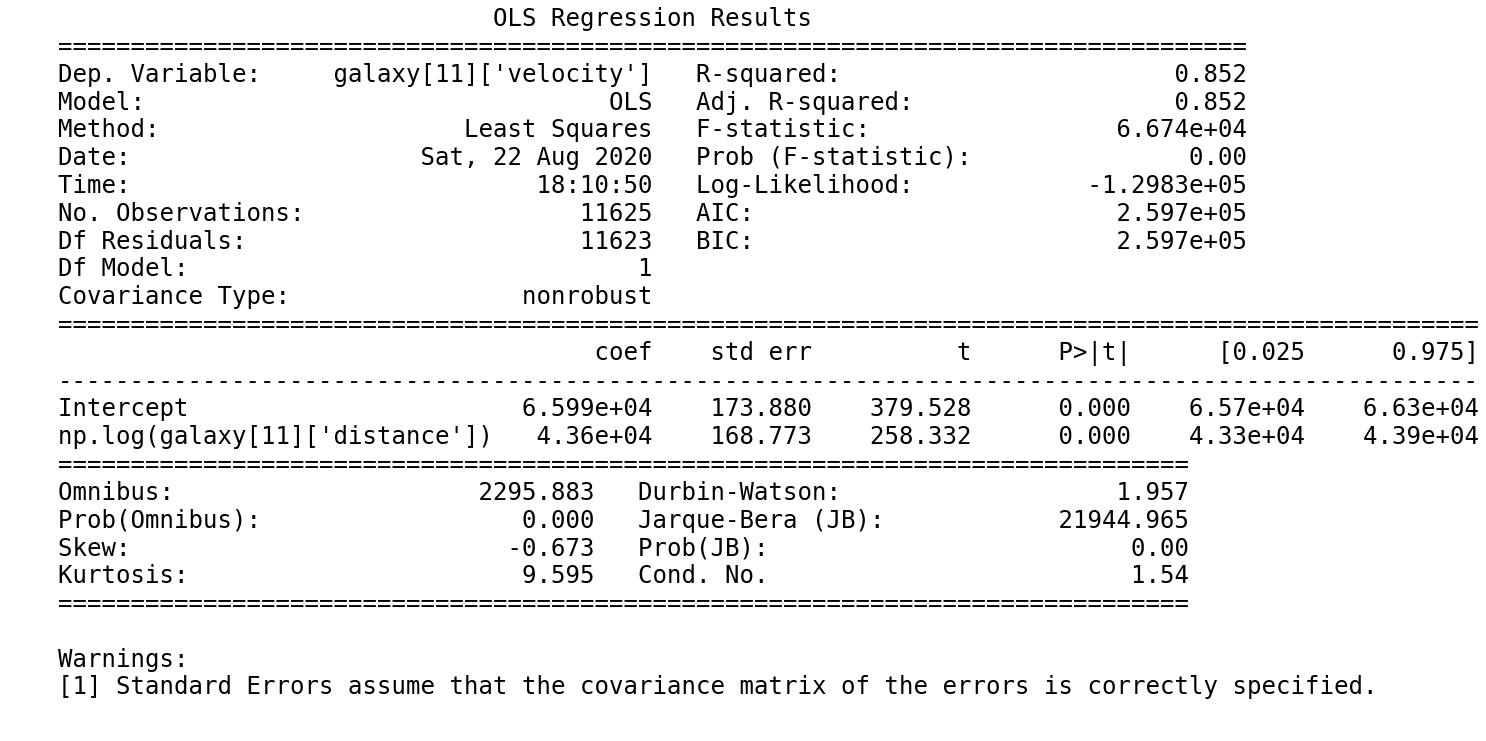

In [26]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model6.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS Hubble(Log of distance).png')

In [27]:
##Re-exporting our data since we removed a bunch of outliers here.

# finaldata2 = []

# for i in range(len(qso)):
#     frames = [qso[i], galaxy[i]]
#     whole_data = pd.concat(frames)
#     finaldata2.append(whole_data)

# for i in range(len(finaldata2)):
#     finaldata2[i].to_csv('no_outliers_%s.csv' %(1+i),index=False)

In [28]:
# /Users/nicholaskeefer/Desktop/DS & Cosmology/Project/DS_Cosmology_Project/no_outliers/